<a href="https://colab.research.google.com/github/yashyaks/ML-Playground/blob/main/ML2/ML2_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###attempt 1

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import re


In [ ]:
data = pd.read_csv('/content/Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]


In [ ]:
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)


<ipython-input-4-9364c355eadc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
<ipython-input-4-9364c355eadc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


1162
4294


In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 27, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511194 (1.95 MB)
Trainable params: 511194 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(1827, 27) (1827, 2)
(901, 27) (901, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)


Epoch 1/7
58/58 - 14s - loss: 0.5346 - accuracy: 0.7822 - 14s/epoch - 243ms/step
Epoch 2/7
58/58 - 9s - loss: 0.4418 - accuracy: 0.8046 - 9s/epoch - 159ms/step
Epoch 3/7
58/58 - 10s - loss: 0.3053 - accuracy: 0.8856 - 10s/epoch - 165ms/step
Epoch 4/7
58/58 - 10s - loss: 0.2133 - accuracy: 0.9091 - 10s/epoch - 170ms/step
Epoch 5/7
58/58 - 8s - loss: 0.1409 - accuracy: 0.9480 - 8s/epoch - 138ms/step
Epoch 6/7
58/58 - 9s - loss: 0.1417 - accuracy: 0.9507 - 9s/epoch - 161ms/step
Epoch 7/7
58/58 - 9s - loss: 0.0850 - accuracy: 0.9655 - 9s/epoch - 161ms/step


In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

OverflowError: ignored

In [ ]:
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  139  515    5   87    6   43 1479   43   35    5   87]]


ValueError: ignored

### attempt2

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

import re

In [ ]:
Dataset = pd.read_csv('/content/Sentiment.csv')

In [ ]:
Dataset.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
Dataset.shape

(13871, 21)

In [ ]:
# Just Select the Necessary Columns

Dataset = Dataset[['text', 'sentiment']]

In [ ]:
Dataset.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [ ]:
Dataset['text']

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: text, Length: 13871, dtype: object

In [ ]:
Dataset['text'] = Dataset['text'].map(lambda x: x.lower())
Dataset['text'] = Dataset['text'].map(lambda x: re.sub('[^a-z0-9\s]','', x))

for i in range(Dataset.shape[0]):
    Dataset['text'][i] = Dataset['text'][i].replace('rt', '')

In [ ]:
Dataset['text']

0         nancyleegrahn how did everyone feel about the...
1         scottwalker didnt catch the full gopdebate la...
2         tjmshow no mention of tamir rice and the gopd...
3         robgeorge that carly fiorina is trending  hou...
4         danscavino gopdebate w realdonaldtrump delive...
                               ...                        
13866     cappyyarbrough love to see men who will never...
13867     georgehenryw who thought huckabee exceeded th...
13868     lrihendry tedcruz as president i will always ...
13869     jrehling gopdebate donald trump says that he ...
13870     lrihendry tedcruz headed into the presidentia...
Name: text, Length: 13871, dtype: object

In [ ]:
# Show the count of unique values in the sentiment column
Dataset['sentiment'].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [ ]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(Dataset['text'].values)
X = tokenizer.texts_to_sequences(Dataset['text'].values)
X = pad_sequences(X)

In [ ]:
X

array([[   0,    0,    0, ...,   51, 1019,    1],
       [   0,    0,    0, ..., 1556, 1328,  831],
       [   0,    0,    0, ...,   10,  684,  511],
       ...,
       [   0,    0,    0, ...,   68,   61,    3],
       [   0,    0,    0, ..., 1092, 1567,   80],
       [   0,    0,    0, ...,  193,    3,  864]], dtype=int32)

In [ ]:
# Label y

y = pd.get_dummies(Dataset['sentiment']).values

In [ ]:
y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()

model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))

model.add(SpatialDropout1D(0.4))

model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 28, 128)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 3)                 591       
                                                                 
Total params: 511391 (1.95 MB)
Trainable params: 511391 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=44,
                                                    shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9709, 28), (4162, 28), (9709, 3), (4162, 3))

In [ ]:
BATCH_SIZE = 64
EPOCHS = 8

hist = model.fit(X_train, y_train,
                 epochs = EPOCHS,
                 validation_data = (X_test, y_test),
                 batch_size = BATCH_SIZE,
                 verbose = 1)

Epoch 1/8
152/152 [==============================] - 52s 319ms/step - loss: 0.8541 - accuracy: 0.6297 - val_loss: 0.7563 - val_accuracy: 0.6749
Epoch 2/8
152/152 [==============================] - 47s 313ms/step - loss: 0.7087 - accuracy: 0.6934 - val_loss: 0.7428 - val_accuracy: 0.6864
Epoch 3/8
152/152 [==============================] - 50s 330ms/step - loss: 0.6436 - accuracy: 0.7243 - val_loss: 0.7481 - val_accuracy: 0.6869
Epoch 4/8
152/152 [==============================] - 49s 318ms/step - loss: 0.6029 - accuracy: 0.7445 - val_loss: 0.7646 - val_accuracy: 0.6814
Epoch 5/8
152/152 [==============================] - 49s 325ms/step - loss: 0.5810 - accuracy: 0.7528 - val_loss: 0.7826 - val_accuracy: 0.6730
Epoch 6/8
152/152 [==============================] - 47s 310ms/step - loss: 0.5503 - accuracy: 0.7639 - val_loss: 0.7901 - val_accuracy: 0.6843
Epoch 7/8
152/152 [==============================] - 48s 314ms/step - loss: 0.5273 - accuracy: 0.7747 - val_loss: 0.8112 - val_accuracy:

In [ ]:
score, acc = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

print('Score: {:.2f}'.format(score))
print('Accuracy: {:.2f}'.format(acc))

66/66 [==============================] - 3s 51ms/step - loss: 0.8345 - accuracy: 0.6737
Score: 0.83
Accuracy: 0.67


In [ ]:
# Let's test the model

tweet = ['Meetings: Because none of us is as dumb as all of us.']

# Vectorizing the tweet by the pre-fitted tokenizer instance
tweet = tokenizer.texts_to_sequences(tweet)

# Padding the tweet to have exactly the same shape as `embedding_2` input
tweet = pad_sequences(tweet, maxlen=28, dtype='int32', value=0)

sentiment = model.predict(tweet, batch_size=1, verbose=1)[0]

if(np.argmax(sentiment) == 0):
    print("negative")

elif (np.argmax(sentiment) == 1):
    print("positive")

elif (np.argmax(sentiment) == 2):
    print("nature")

1/1 [==============================] - 1s 651ms/step
negative


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [ ]:
data = Dataset
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


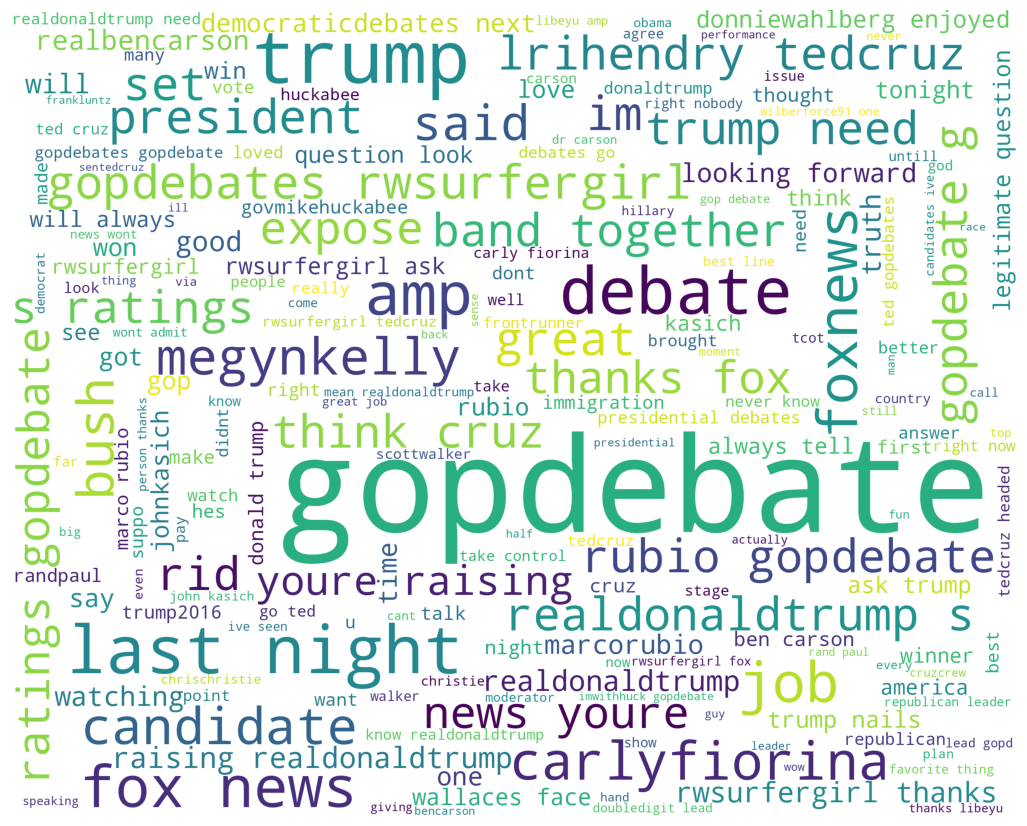

Negative words


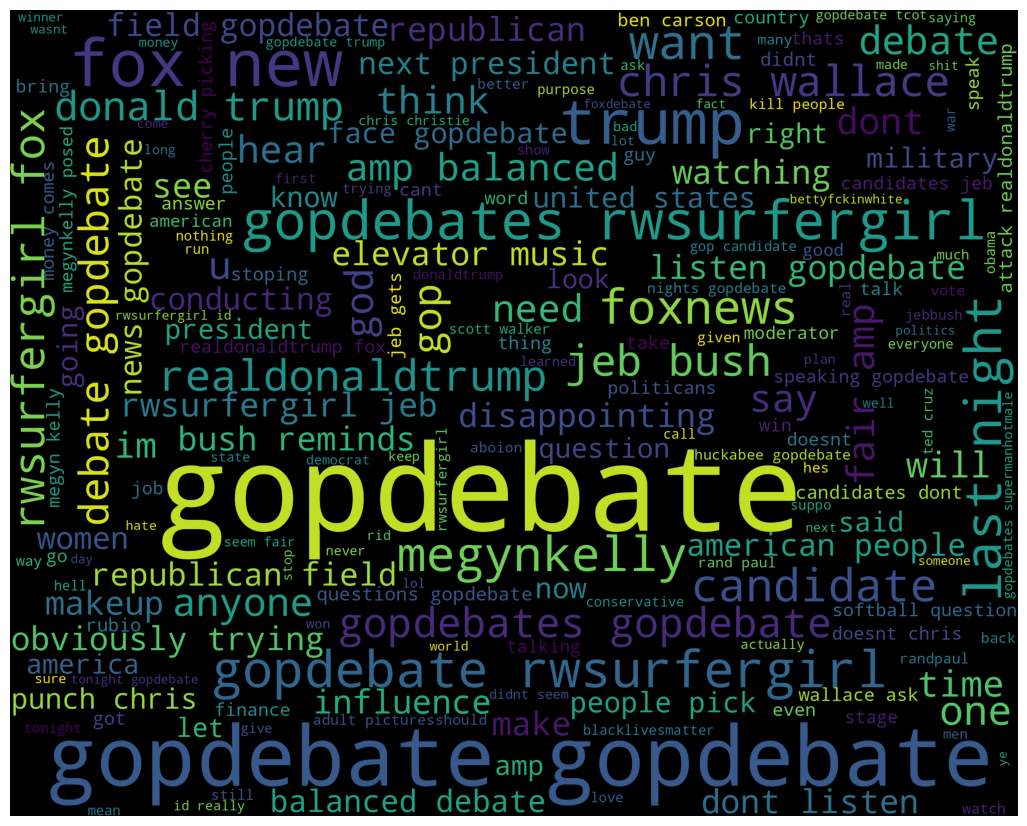

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)